In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# DATA CLEANSING & PREPARATION

### Load Data

In [168]:
df = pd.read_csv("/Users/mac/Downloads/customer_analysis.csv", sep="\t",index_col=0)
df.head().transpose()

ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173
MntFruits,88,1,49,4,43


### 1. Missing Values Check

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [170]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [171]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 2. Date time Format 

In [172]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [173]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373
MntFishProducts,2240.0,37.525446,0.0,3.0,12.0,50.0,259.0,54.628979


In [174]:
df.isna().sum() 

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Missing Values & Outliers Handling 

In [175]:
# replace null values of Income column with mean
df['Income'].fillna(df['Income'].mean(), inplace=True)
# drop Z_Revenue and Z_CostContact because they are constant
df.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

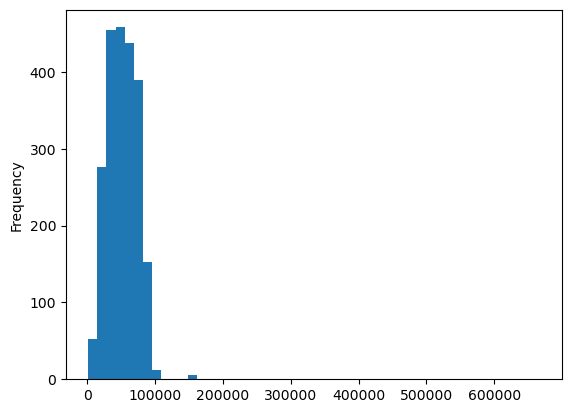

In [176]:
# Visualize the distribution of income because in df.describe() we see that the mean is 52247.251354 and the max is 666666.0
df['Income'].plot(kind='hist', bins=50)
plt.show()


In [177]:
# Hapus outliers kolom Income karena cukup mengganggu
# IQR = Q3 - Q1
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# filter out outliers
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) |(df['Income'] > (Q3 + 1.5 * IQR)))]
df['Income'].describe()

count      2232.000000
mean      51640.236126
std       20601.760369
min        1730.000000
25%       35434.750000
50%       51566.000000
75%       68118.000000
max      113734.000000
Name: Income, dtype: float64

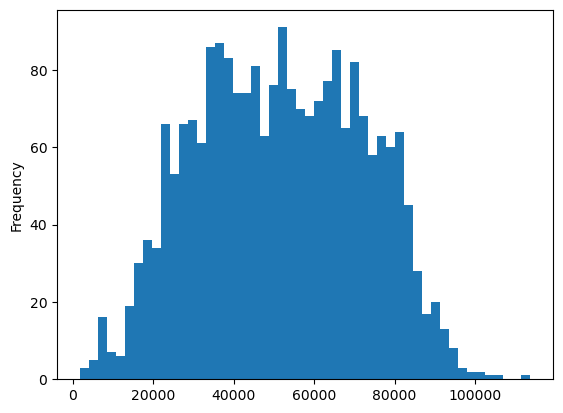

In [178]:
# Setelah outlier dihapus, visualisasikan kembali distribusi kolom Income
df['Income'].plot(kind='hist', bins=50)
plt.show()

### 3. categorical feature that needs to be encoded into numerical format
### hanya Education dan marital status, proses dibawah

# Feature Engineering (Create/Remove feature from available data):

### 1. Age Extraction: We'll unveil the age of each customer by deciphering their birth year from the "Year_Birth." 

In [179]:
# Age extraction
current_year = pd.to_datetime('today').year

df['Age'] = current_year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

In [180]:
df['Age'].describe()

count    2232.000000
mean       54.207437
std        11.990340
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

### 2. Spending Power: Introducing "Spent," a dynamic feature showcasing the total expenditure across various categories over the past two years.

In [181]:
# kolom "Spent", yang menggabungkan "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [182]:
df['TotalSpent'].describe()

count    2232.000000
mean      605.596326
std       601.444172
min         5.000000
25%        69.000000
50%       396.500000
75%      1044.250000
max      2525.000000
Name: TotalSpent, dtype: float64

###  Parental Status: "Is_Parent" will be born, simplifying the journey of parenthood for our customers.

In [183]:
# Kolom "isParent", yang menggabungkan "Kidhome" dan "Teenhome"
# if there are kids in the house set the value to 1, otherwise 0
df['isParent'] = (df['Kidhome'] + df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)

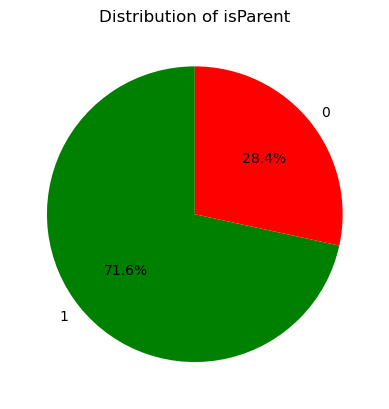

In [184]:
# hitung jumlah nilai di kolom 'isParent'
counts = df['isParent'].value_counts()

# Visualisasi pake pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['green','red'])
plt.title('Distribution of isParent')
plt.show()

### Family Dynamics: "Children" will emerge, quantifying the number of children in a household, encompassing both the young ones and teenagers.

In [185]:
# Kolom "totalChildren", menggabungkan "Kidhome" dan "Teenhome" untuk menghitung jumlah anak dalam rumah tangga
df['totalChildren'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

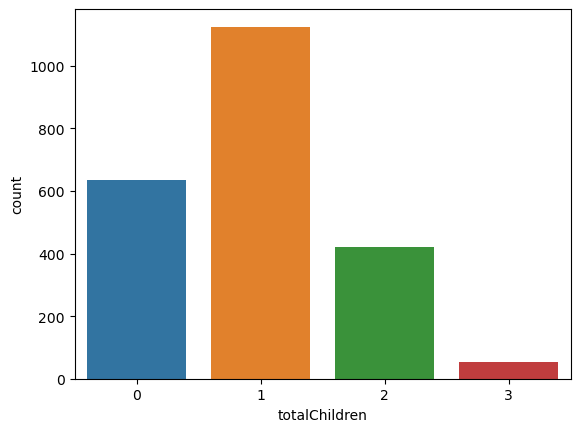

In [186]:
# visualisasi kolom "totalChildren" yang baru menggunakan countplot
sns.countplot(x='totalChildren', data=df)
plt.show()

### Family Unity: "Family_Size" will take shape, providing insights into the size and structure of each household.

In [187]:
df['Marital_Status'].value_counts()

Marital_Status
Married     861
Together    576
Single      480
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [188]:
# kolom "familySize", menggabungkan "Marital_Status" dan "totalChildren"
# if the customer is married then it is 2, otherwise 1

marital_mapping = {
    "Married": 2,
    "Together": 2,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 1,
    "Absurd": 1,
    "YOLO": 1
}
df['familySize'] = df['Marital_Status'].map(marital_mapping) + df['totalChildren']

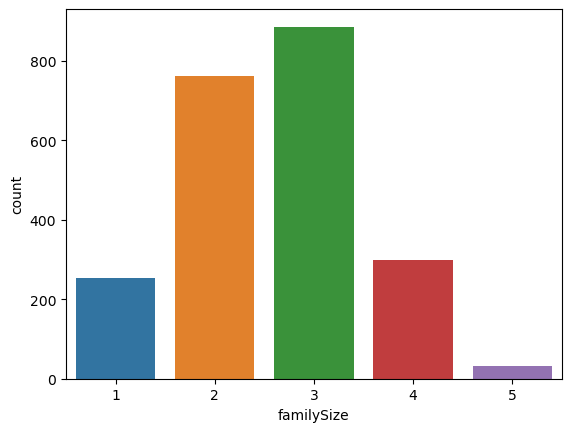

In [189]:
# visualisasi kolom "familySize" yang baru menggunakan countplot
sns.countplot(x='familySize', data=df)
plt.show()

### Household Living Arrangement: craft "Living_With" from "Marital_Status," revealing the living arrangements of  valued couples.

In [190]:
# encoding kolom "Marital_Status" menjadi 3 nilai yang berbeda (dari "Married", "Together", "Divorced", "Single", "Widow", "Alone", "Absurd", "Yolo") menjadi hanya 3 nilai (0, 1, 2)
# mengganti nilai "Married" dan "Together" menjadi 0, "Divorced", "Single", dan "Widow" menjadi 1, dan "Alone", "Absurd", dan "YOLO" menjadi 2
marital_mapping = {
    "Married": 0,
    "Together": 0,
    "Divorced": 1,
    "Single": 1,
    "Widow": 1,
    "Alone": 2,
    "Absurd": 2,
    "YOLO": 2
}

# aplikasikan mapping ke kolom "Marital_Status"
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

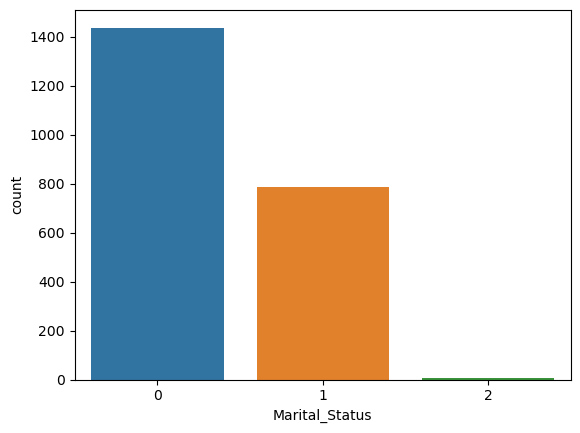

In [191]:
# visualisasi kolom "Marital_Status" yang baru menggunakan countplot
sns.countplot(x='Marital_Status', data=df)
plt.show()

### 7. Educational Evolution: "Education" will undergo a transformation, restructured into three distinct categories for clarity.

In [192]:
# uraikan tanggal, bulan, dan tahun dari kolom "Dt_Customer" menjadi 3 kolom baru dengan nama "EnrollDate", "EnrollMonth", dan "EnrollYear"
df['EnrollDate'] = df['Dt_Customer'].dt.day
df['EnrollMonth'] = df['Dt_Customer'].dt.month
df['EnrollYear'] = df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)

In [193]:
# encoding kolom "Education" menjadi 3 nilai yang berbeda (dari "Graduation", "PhD", "Master", "2n Cycle", "Basic") menjadi hanya 3 nilai (0, 1, 2)
# mengganti nilai "Basic" menjadi 0, "2n Cycle" dan "Graduation" menjadi 1, dan "Master" dan "PhD" menjadi 2
education_mapping = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 1,
    "Master": 2,
    "PhD": 2
}
# aplikasikan mapping ke kolom "Education"
df['Education'] = df['Education'].map(education_mapping)

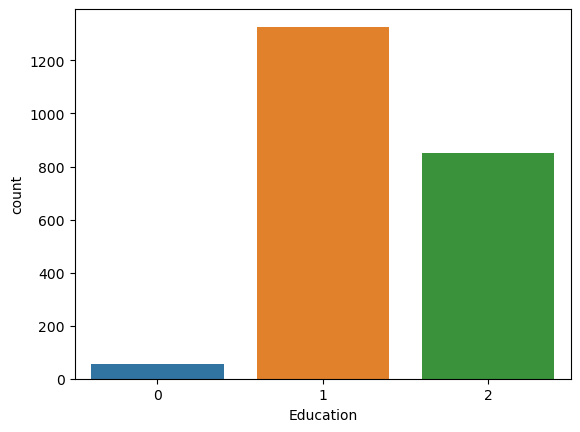

In [194]:
# visualisasi kolom "Education" yang baru menggunakan countplot
sns.countplot(x='Education', data=df)
plt.show()

### 8. Farewell to Redundancy: We'll bid adieu to redundant features, streamlining our dataset for a sleek and insightful analysis.

In [1]:
## Ini sudah dilakukan setiap kali membuat fitur, maka fitur (kolom) yang lama juga langsung dihapus

# Data Preparation
### 1. Label Encoding: Translate categorical features into numbers so that your algorithms can work their magic.

In [195]:
## ketika mengerjakan soal yang diatas sudah melakukan encoding

### Scaling: Using the standard scaler to put all features on the same playing field, making it easier for your algorithms to do their thing.

In [196]:
# create a StandardScaler object
scaler = StandardScaler()
scaler.fit(df)

scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns, index=df.index)
scaled_df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,TotalSpent,isParent,totalChildren,familySize,EnrollDate,EnrollMonth,EnrollYear
ID,,,,,,,,,,,,,,,,,,,,,
5524,-0.677287,1.317478,0.315469,0.307081,0.980281,1.547741,1.735476,2.457243,1.472657,0.839843,...,-0.097458,2.383828,0.983726,1.682002,-1.587610,-1.266161,-1.759248,-1.329084,0.724679,-1.501146
2174,-0.677287,1.317478,-0.257134,-0.383851,-0.872949,-0.637496,-0.726318,-0.651911,-0.633057,-0.731254,...,-0.097458,-0.419493,1.233983,-0.962227,0.629878,1.394923,0.446111,-0.873100,-0.994829,1.420003
4141,-0.677287,-0.738893,0.969686,-0.798410,0.359568,0.568152,-0.174694,1.341605,-0.148984,-0.041504,...,-0.097458,-0.419493,0.316372,0.283388,-1.587610,-1.266161,-0.656569,0.608846,0.438095,-0.040572
6182,-0.677287,-0.738893,-1.213481,-0.798410,-0.872949,-0.562143,-0.662493,-0.505598,-0.584649,-0.750414,...,-0.097458,-0.419493,-1.268592,-0.918988,0.629878,0.064381,0.446111,-0.645108,-1.281414,1.420003
5324,1.219456,-0.738893,0.322994,1.550759,-0.391822,0.417446,-0.215724,0.152811,-0.003763,-0.558817,...,-0.097458,-0.419493,-1.018334,-0.305328,0.629878,0.064381,0.446111,0.380855,-1.567998,1.420003


# Clustering

### 1. Elbow Method: We'll pinpoint the ideal number of clusters.

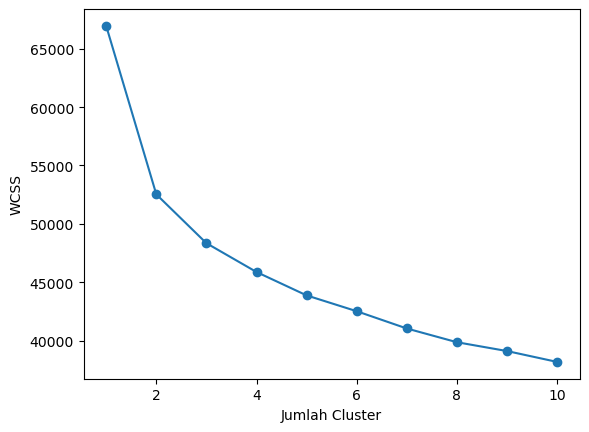

In [197]:
WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(scaled_df)
    WCSS.append(kmeans.inertia_)
    
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

In [198]:
#KneeLocator
# Declare x and y values
x = range(1, 11)
y = WCSS

# Create KneeLocator obj
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print("The recommended number of clusters is:", kn.elbow)

The recommended number of clusters is: 3


### 2. Agglomerative Clustering: The heart of our clustering journey.

In [199]:
model = AgglomerativeClustering(n_clusters=kn.elbow, metric='euclidean', linkage='ward')
labels = model.fit_predict(scaled_df)
df['Cluster'] = labels
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Age,TotalSpent,isParent,totalChildren,familySize,EnrollDate,EnrollMonth,EnrollYear,Cluster
ID,,,,,,,,,,,,,,,,,,,,,
5524,1,1,58138.0,58,635,88,546,172,88,88,...,1,66,1617,0,0,1,4,9,2012,0
2174,1,1,46344.0,38,11,1,6,2,1,6,...,0,69,27,1,2,3,8,3,2014,1
4141,1,0,71613.0,26,426,49,127,111,21,42,...,0,58,776,0,0,2,21,8,2013,0
6182,1,0,26646.0,26,11,4,20,10,3,5,...,0,39,53,1,1,3,10,2,2014,1
5324,2,0,58293.0,94,173,43,118,46,27,15,...,0,42,422,1,1,3,19,1,2014,2


In [200]:
df.groupby('Cluster').agg(count=('Cluster', 'count'), 
                          Income=('Income', 'mean'),
                          NumCatalogPurchases=('NumCatalogPurchases', 'mean'),
                          NumStorePurchases=('NumStorePurchases', 'mean'),                          
                          NumDealsPurchases=('NumDealsPurchases', 'mean'),
                          NumWebPurchases=('NumWebPurchases', 'mean'),
                          MntWines=('MntWines', 'mean'),
                          MntFruits=('MntFruits', 'mean'),
                          MntMeatProducts=('MntMeatProducts', 'mean'),
                          MntFishProducts=('MntFishProducts', 'mean'),
                          NumWebVisitsMonth=('NumWebVisitsMonth', 'mean'),
                          Age=('Age', 'mean'),
                          TotalSpent=('TotalSpent', 'mean'), 
                          isParent=('isParent', 'mean'),
                          TotalChildren=('totalChildren', 'mean'),
                          FamilySize=('familySize', 'mean'),
                          EnrollYear=('EnrollYear', 'mean'),
                          )

,count,Income,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebPurchases,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebVisitsMonth,Age,TotalSpent,isParent,TotalChildren,FamilySize,EnrollYear
Cluster,,,,,,,,,,,,,,,,,
0,512,75678.391127,5.726562,8.285156,1.224609,4.996094,647.808594,62.103516,456.724609,90.603516,2.919922,54.740234,1396.193359,0.113281,0.142578,1.750000,2013.013672
1,1102,36363.639989,0.867514,3.559891,2.090744,2.567151,78.541742,6.832123,36.375681,10.551724,6.425590,52.079855,159.803993,0.852995,1.186933,2.818512,2013.108893
2,618,58965.921534,3.229773,7.765372,3.629450,6.082524,424.551780,31.642395,153.825243,42.080906,5.378641,57.559871,745.527508,0.970874,1.202265,2.898058,2012.894822


### 3. Scatter Plot Revelations: We'll unveil the cluster patterns using scatter plots.

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


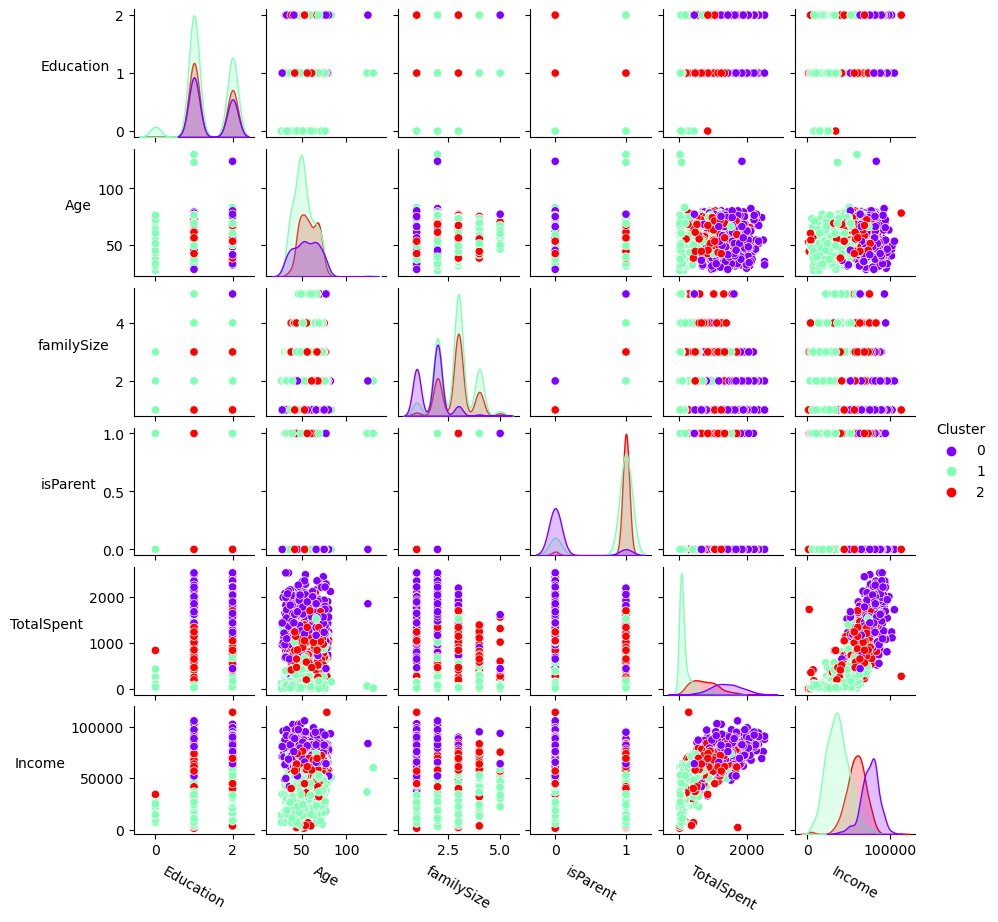

In [201]:
sp = sns.pairplot(df[['Cluster', 'Education', 'Age', 'familySize', 'isParent', 'TotalSpent', 'Income']], hue='Cluster', palette='rainbow', height=1.5)
for ax in sp.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

# Visualization 
### 1. Scatterplots, swarmplot, boxenplot to evaluate your clustering models

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


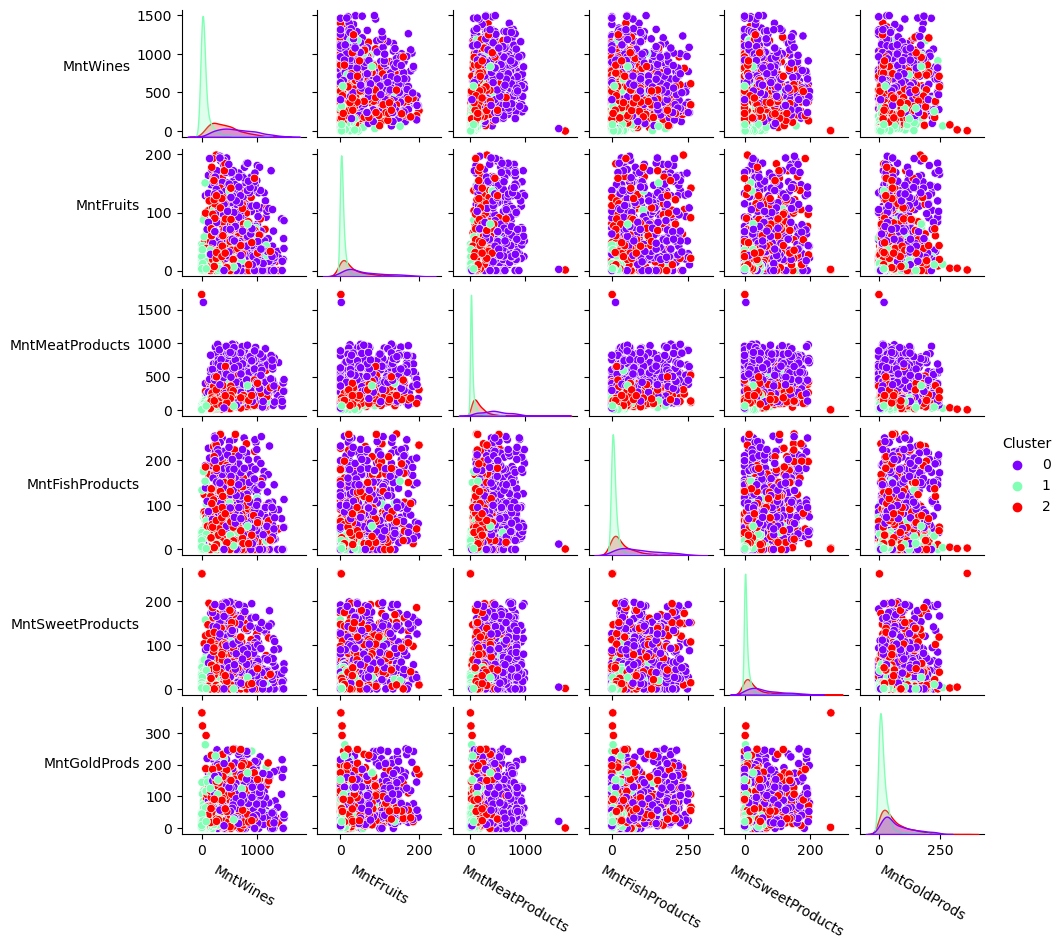

In [202]:
# SCATTERPLOT
sp = sns.pairplot(df[['Cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']], hue='Cluster', height=1.5, palette='rainbow')
for ax in sp.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


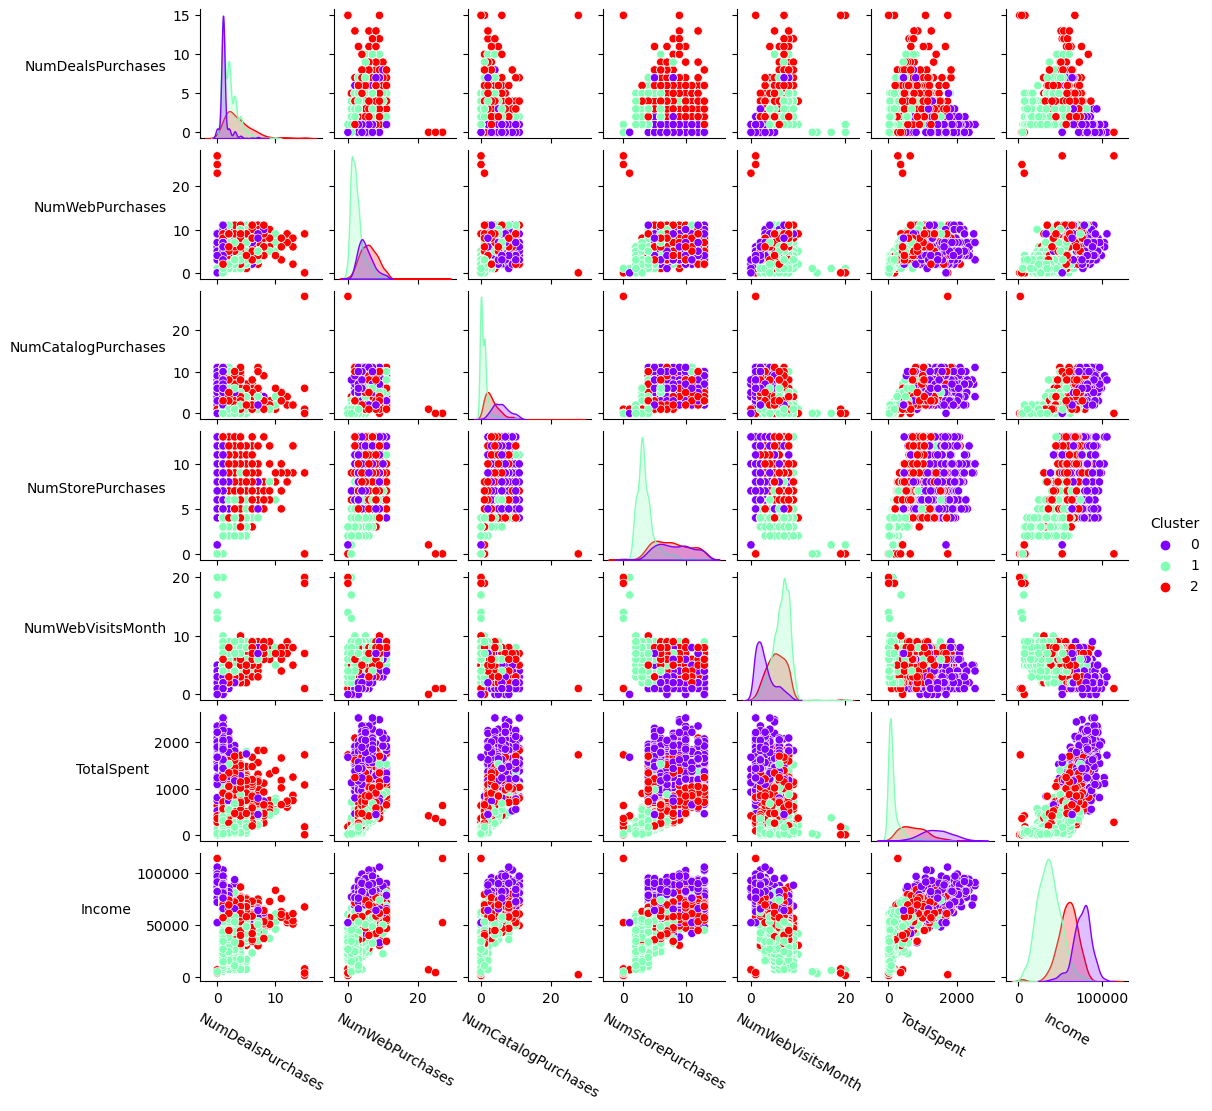

In [203]:
#SCATTERPLOT
sp = sns.pairplot(df[['Cluster', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'TotalSpent', 'Income']], hue='Cluster', height=1.5, palette='rainbow')
for ax in sp.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-30)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

### 2. Distribution of cluster chart

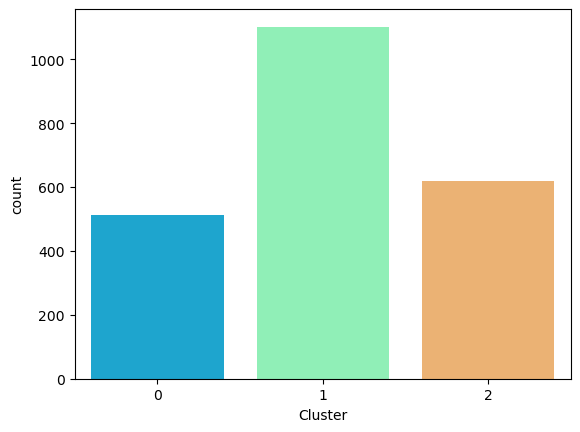

In [205]:
# Menggunakan COUNTPLOT untuk melihat distribusi cluster
sns.countplot(x='Cluster', data=df, palette='rainbow')
plt.show()

### 3. Profiling between income and spending cluster

In [207]:
# menggunakan describe() untuk melihat statistik dari kolom "TotalSpent" dan "Income" berdasarkan cluster
df.groupby('Cluster')[['TotalSpent', 'Income']].describe().transpose()

Cluster                       0             1              2
TotalSpent count     512.000000   1102.000000     618.000000
           mean     1396.193359    159.803993     745.527508
           std       443.009398    235.854328     391.094711
           min        46.000000      5.000000       8.000000
           25%      1096.000000     41.000000     437.250000
           50%      1378.500000     69.000000     703.000000
           75%      1690.000000    165.000000    1011.250000
           max      2525.000000   1804.000000    2092.000000
Income     count     512.000000   1102.000000     618.000000
           mean    75678.391127  36363.639989   58965.921534
           std     10945.908905  13702.286210   12262.294486
           min     33051.000000   3502.000000    1730.000000
           25%     69509.000000  26672.250000   52179.562838
           50%     76713.000000  35790.500000   59781.500000
           75%     82469.250000  45044.250000   67006.000000
           max    105471.000000  88194.000000  113734.000000

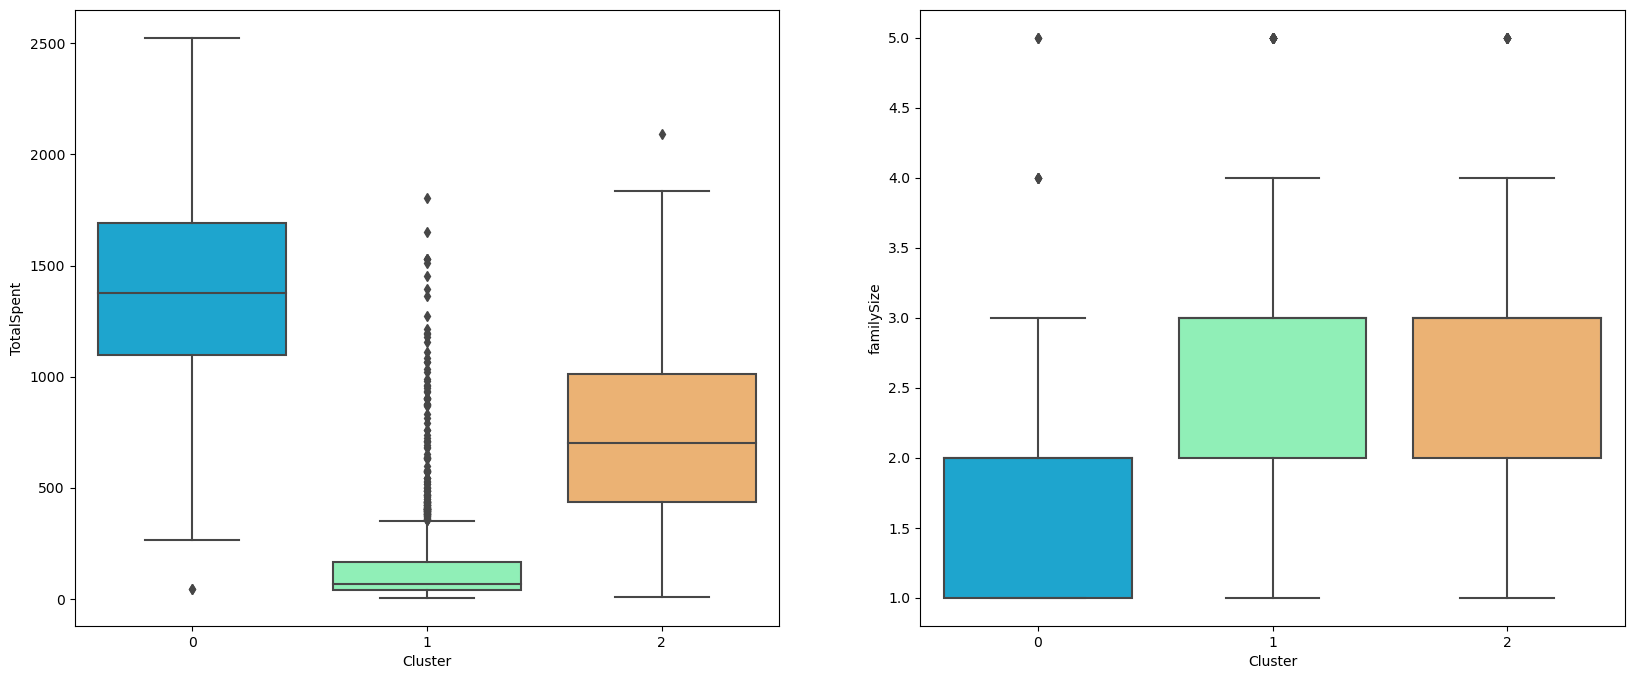

In [208]:
# BOXPLOT
# plot family size dari cluster 0-2 berdampingan dengan total spent
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(x='Cluster', y='TotalSpent', data=df, ax=ax[0], palette='rainbow')
sns.boxplot(x='Cluster', y='familySize', data=df, ax=ax[1], palette='rainbow')
plt.show()

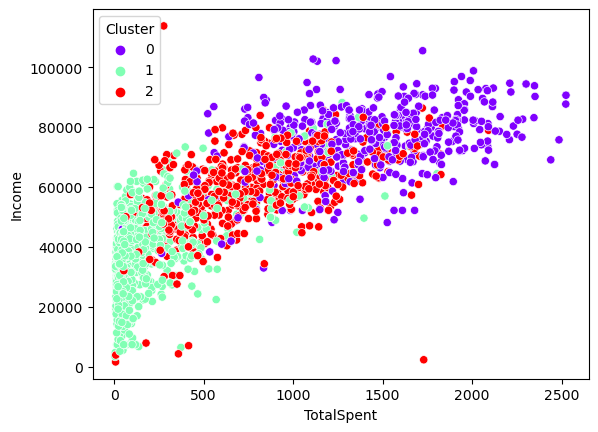

In [209]:
# SCATTERPLOT familySize dari cluster 0-2 berdampingan dengan Income
sns.scatterplot(x='TotalSpent', y='Income', hue='Cluster', data=df, palette='rainbow')
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 60.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


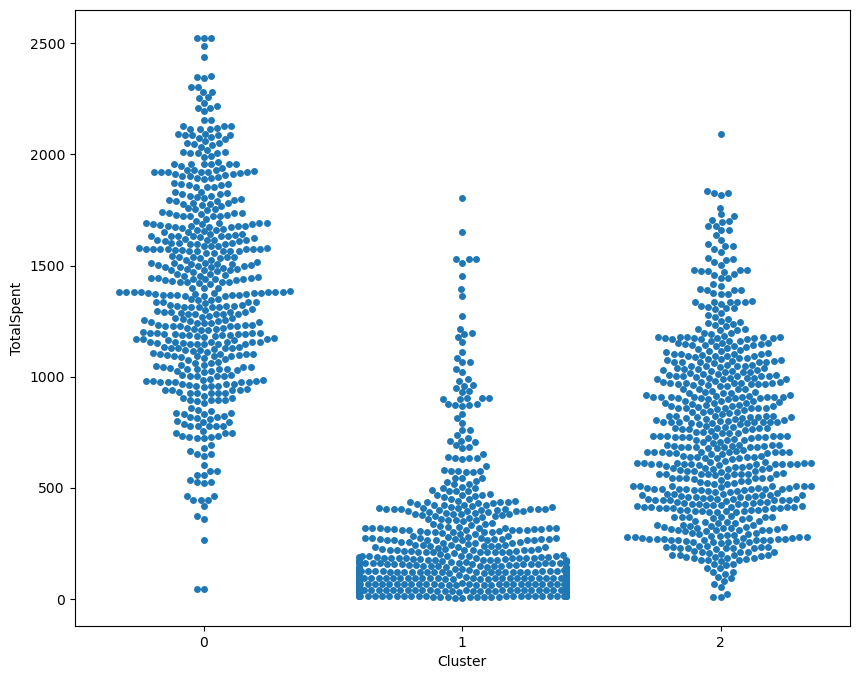

In [210]:
# SWARMPLOT Cluster vs TotalSpent
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Cluster', y='TotalSpent', data=df)
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 19.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


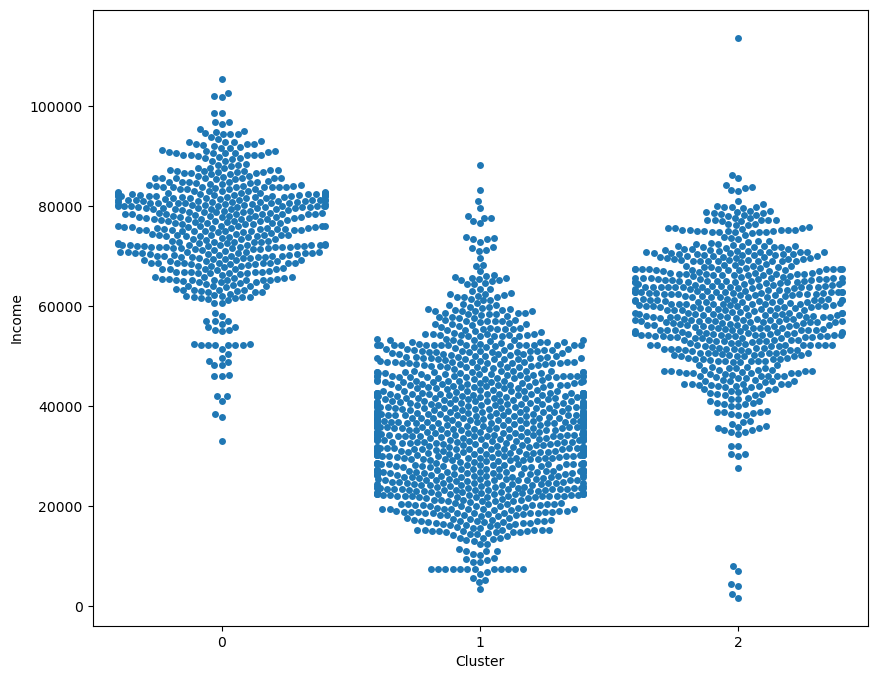

In [211]:
#SWARMPLOT Cluster vs Income
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Cluster', y='Income', data=df)
plt.show()